<a href="https://colab.research.google.com/github/jesusandresbaez/Epidemia_dengue_en_2020/blob/master/Epidemia_dengue_en_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Conectamos con Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


###2. Importamos las librerias que utilizaremos

In [2]:
import pandas as pd
import numpy as np
from seaborn import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

###3. Importamos nuestros DataFrames

In [3]:
df20 = pd.read_csv('/content/drive/MyDrive/Marca Personal/Data Sicence/Laboratorio 2020/df20.csv')
df19 = pd.read_csv('/content/drive/MyDrive/Marca Personal/Data Sicence/Laboratorio 2020/df19.csv')
df21 = pd.read_csv('/content/drive/MyDrive/Marca Personal/Data Sicence/Laboratorio 2020/df21.csv')

### 3. Concatenamos los DataFrames
Incluye una variable llamada "Periodo" a cada DataFrame que indiqué si el dataframe pertenece al 2019 o al 2020. Esto ayudará a saber si la fila de registros pertenece al 2019 o 2020 al unir los DataFrames.

In [4]:
df20['Periodo']='2020'
df19['Periodo']='2019'
df21['Periodo']='2021'
df = pd.concat([df19, df20, df21], ignore_index=True)

###4. Analizando las variables del Dataset creado

- Aplicamos el método ".dtypes" a nuestro Dataset
- Tenemos que cambiar las variables "Fecha" porque se muestra como tipo "objeto" y la variable "Cantidad" porque se muestra como "int64" 


In [5]:
df.dtypes

Clave          object
Estudio        object
Costo_dlls    float64
Fecha          object
Genero         object
Cantidad        int64
Periodo        object
dtype: object

Modificamos las variables según sea su naturaleza

In [6]:
df['Fecha'] = pd.to_datetime(df['Fecha']) #Cambio de variable tipo "object" a "fecha"
df[['Cantidad']] = df[['Cantidad']].astype(int) #Cambio de variable tipo  "float" a "int64"
df[['Genero']] = df[['Genero']].astype('category') #Cambio de variable tipo "object" a "Category"
df['Periodo'] = df[['Periodo']].astype('category') #Cambio de variable tipo "object" a "Category"

In [7]:
df

,Clave,Estudio,Costo_dlls,Fecha,Genero,Cantidad,Periodo
0,MX-0843,PAPANICOLAU,14.5,2019-08-30,Femenino,1,2019
1,MX-0843,PAPANICOLAU,14.5,2019-11-21,Femenino,1,2019
2,MX-0843,PAPANICOLAU,14.5,2019-12-02,Femenino,1,2019
3,MX-0843,PAPANICOLAU,14.5,2019-12-17,Femenino,1,2019
4,MX-0843,PAPANICOLAU,14.5,2019-08-14,Femenino,1,2019
...,...,...,...,...,...,...,...
15469,MX-02010,ANTIDOPING 5 CON CERTIFICAADO MEDICO,30.0,2021-02-16,Masculino,1,2021
15470,MX-02010,ANTIDOPING 5 CON CERTIFICAADO MEDICO,30.0,2021-02-16,Masculino,1,2021
15471,MX-02010,ANTIDOPING 5 CON CERTIFICAADO MEDICO,30.0,2021-02-16,Masculino,1,2021
15472,MX-02010,ANTIDOPING 5 CON CERTIFICAADO MEDICO,30.0,2021-02-16,Masculino,1,2021


In [8]:
#Aplicamos el metodo nunique() para saber los valores únicos de cada variable
df.nunique()

Clave          240
Estudio        248
Costo_dlls     171
Fecha         1836
Genero           2
Cantidad         1
Periodo          3
dtype: int64

In [9]:
#Generamos una columna nueva con el mes correspondiente a cada registro extraido de la variable Fecha
df['Mes'] = df['Fecha'].dt.month 

#Generamos una columna nueva con el dia correspondiente a cada registro extraido de la variable Fecha
df['Dia'] = df['Fecha'].dt.day  

In [10]:
#Creando las columnas de cada "Genero"

df_genero = pd.get_dummies(df, columns = ["Genero"], dtype= int)
#Con el metódo pd.get_dummies vamos a crear 2 columnas 
#Esas columnas llevaran el nombre de la columna original seguido del nombre de su categoria siendo "1"
#Támbien determinamos el tipo de variable con dtype= int

In [11]:
#Creación de genero dataset
df_top_genero = df_genero.groupby(['Periodo', 'Estudio'])[['Genero_Masculino', 'Genero_Femenino']].sum().reset_index().sort_values(by='Genero_Femenino', ascending= False).head(9)

In [12]:
df_top_genero

,Periodo,Estudio,Genero_Masculino,Genero_Femenino
456,2021,PRUEBA DE CONTAGIO COVID,800,890
185,2020,CITOMETRIA HEMATICA COMPLETA,467,602
392,2021,EXAMEN GENERAL DE ORINA,354,517
348,2021,CITOMETRIA HEMATICA COMPLETA,365,491
459,2021,QUIMICA SANGUINEA COMPLETA (7 ELEMENTOS),305,432
457,2021,PRUEBA DE EMBARAZO (PIE),0,377
223,2020,EXAMEN GENERAL DE ORINA,241,355
275,2020,PRUEBA DE EMBARAZO (PIE),0,302
278,2020,QUIMICA SANGUINEA COMPLETA (7 ELEMENTOS),247,295


## 5 Análisis de estudios de Dengue

Primeramente extraemos los datos del estudio de "Dengue NS1, Igg e Igm" de nuestro dataframe

In [ ]:
#Creando un nuevo dataframe con los valores referentes al nombre del estudio
dengue 	= df.loc[:, 'Estudio'] == 'DENGUE NS1 Igg e Igm'
df_dengue = df.loc[dengue]
df_dengue.head()

##Creando tablas y gráficas acerca del estudio clínico "Dengue NS1, Igg e Igm"

In [17]:
#Creando un groupby
estudio_dengue = df_dengue.groupby(['Periodo'])[['Cantidad']].sum().sort_values(by='Periodo', ascending= True)
estudio_dengue

,Cantidad
Periodo,
2019,8
2020,194
2021,26


Extraemos únicamente los datos relacionados al dengue por año 

In [18]:
df_dengue.groupby(['Periodo'])[['Cantidad']].sum().sort_values(by='Periodo', ascending= True).reset_index()

,Periodo,Cantidad
0,2019,8
1,2020,194
2,2021,26


Creamos nuestra gráfica de comparación por año

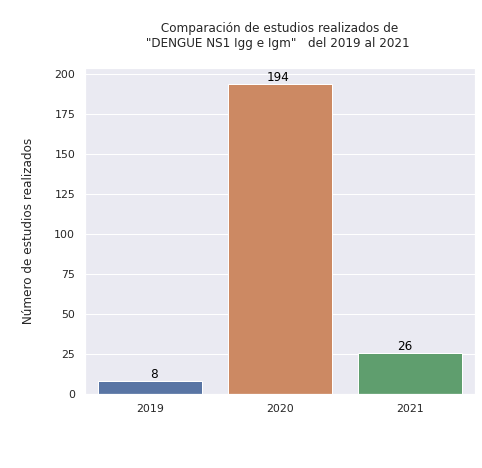

In [64]:
#Usar un estilo de grilla
sns.set()

#Parámetros de la gráfica
fig = plt.figure(figsize =(7, 6)) 
plt.title('\n Comparación de estudios realizados de \n "DENGUE NS1 Igg e Igm"   del 2019 al 2021  \n')
sns.countplot(data=df_dengue, x='Periodo')
plt.ylabel('\n Número de estudios realizados \n')
plt.xlabel('\n  \n')
plt.text(0, 10,'8', fontsize=12, color='black') 
plt.text(0.9, 196,'194', fontsize=12, color='black') 
plt.text(1.9, 28,'26', fontsize=12, color='black') 
plt.savefig("Comparacion_dengue_año.jpg", dpi=200, bbox_inches='tight')
plt.show()

Creando un groupby para saber el periodo genero y cantidad de estudios realizados

In [20]:
#Groupby comparativo de periodo, género y cantidad
estudio_dengue = df_dengue.groupby(['Periodo', 'Genero'])[['Cantidad']].sum().sort_values(by='Periodo', ascending= True).reset_index()
estudio_dengue

,Periodo,Genero,Cantidad
0,2019,Femenino,6
1,2019,Masculino,2
2,2020,Femenino,99
3,2020,Masculino,95
4,2021,Femenino,9
5,2021,Masculino,17


Gráfica comparativa por año, género y cantidad

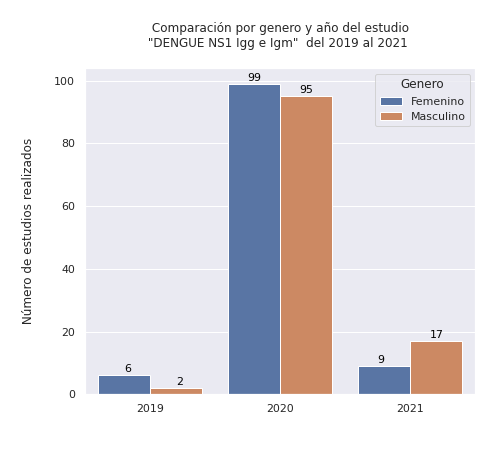

In [90]:
#Usar un estilo de grilla
sns.set()

#Parámetros de la gráfica
fig = plt.figure(figsize =(7, 6)) 
plt.title('\n Comparación por genero y año del estudio \n "DENGUE NS1 Igg e Igm"  del 2019 al 2021  \n')
sns.countplot(data=df_dengue, x='Periodo', hue='Genero')
plt.ylabel('\n Número de estudios realizados \n')
plt.xlabel('\n  \n')

plt.text(-0.2, 7,'6', fontsize=11, color='black') 
plt.text(0.2, 3,'2', fontsize=11, color='black') 

plt.text(0.75, 100,'99', fontsize=11, color='black') 
plt.text(1.15, 96,'95', fontsize=11, color='black') 

plt.text(1.75, 10,'9', fontsize=11, color='black') 
plt.text(2.15, 18,'17', fontsize=11, color='black')  

plt.savefig("Comparacion_estudios__genero_año.jpg", dpi=200, bbox_inches='tight')
plt.show()

Creación de la tabla por género

In [22]:
df_dengue.groupby(['Genero'])[['Cantidad']].sum().reset_index()

,Genero,Cantidad
0,Femenino,114
1,Masculino,114


Grafica de barras y tipo pie para comparar la cantidad de estudios realizados por géneros

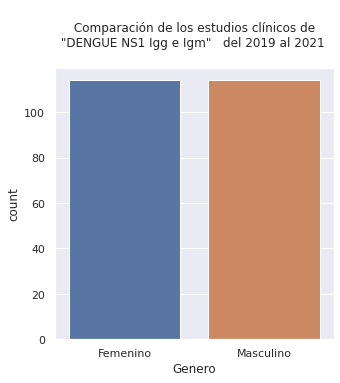

In [23]:
#Usar un estilo de grilla
sns.set()

#Parámetros de la gráfica
fig = plt.figure(figsize =(5, 5)) 
plt.title('\n Comparación de los estudios clínicos de \n "DENGUE NS1 Igg e Igm"   del 2019 al 2021  \n')
sns.countplot(data=df_dengue, x='Genero')
plt.savefig("Comparacion_estudios__genero_año.jpg", dpi=200, bbox_inches='tight')
plt.show()

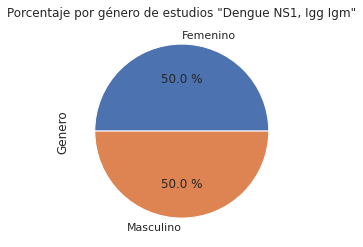

In [24]:
df_dengue['Genero'].value_counts().plot(kind='pie',   autopct="%0.1f %%", title='Porcentaje por género de estudios "Dengue NS1, Igg Igm"')
plt.savefig("Porcentaje_comparacion_estudios_covid_genero.jpg", dpi=100, bbox_inches='tight');

Creamos un dataframe con la cantidad acumulada de estudio de "Dengue" por mes en los 3 años 

In [25]:
#Creamos nuestro dataframe para visualizar el historico
df_dengue_mensual = df_dengue.groupby(['Fecha'])[['Cantidad']].sum().reset_index()

#A nuestro Dataframe le aplicamos el metodo .set_index() que pondra como indice principal a la variable 'Fecha'
df_dengue_mensual = df_dengue_mensual.set_index('Fecha')

#Con el metodo .resample('m').sum() vamos a sumar la cantidad de estudios por mes 
df_dengue_mensual = df_dengue_mensual.resample('m').sum().reset_index()

#Obtenemos nuestro dataframe de los 3 años con al suma de los estudios realizados de forma mensual
df_dengue_mensual.index=df_dengue_mensual.index+1
df_dengue_mensual.head()

,Fecha,Cantidad
1,2019-01-31,1
2,2019-02-28,0
3,2019-03-31,0
4,2019-04-30,0
5,2019-05-31,0


Creación de la gráfica del historico de la demanda de estudios del "Dengue"

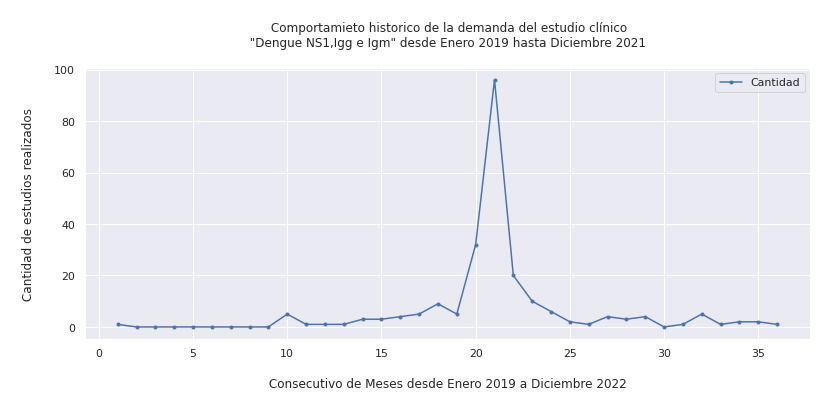

In [91]:
#Parametros de la Gráfica
df_dengue_mensual.plot(kind="line",  y='Cantidad', marker = '.',figsize=(13,5))
plt.title('\n Comportamieto historico de la demanda del estudio clínico\n  "Dengue NS1,Igg e Igm" desde Enero 2019 hasta Diciembre 2021  \n')

plt.xlabel('\n Consecutivo de Meses desde Enero 2019 a Diciembre 2022 \n')
plt.ylabel('\n Cantidad de estudios realizados \n')
plt.savefig("Historico_mensual_3_años.jpg", dpi=300, bbox_inches='tight')
plt.xticks(rotation = 0);
plt.show()

Datos estadisticos de la tabla del historico de la demanda de estudios de dengue

In [27]:
df_dengue_mensual['Cantidad'].describe()

count    36.000000
mean      6.333333
std      16.568473
min       0.000000
25%       0.750000
50%       2.000000
75%       5.000000
max      96.000000
Name: Cantidad, dtype: float64

In [28]:
#Dataframe
df_dengue_mensual.head()

,Fecha,Cantidad
1,2019-01-31,1
2,2019-02-28,0
3,2019-03-31,0
4,2019-04-30,0
5,2019-05-31,0


Creación de tabla con la suma mensual de los estudios realizados de dengue 

In [29]:
#Creamos un groupby con las variables de Periodo y Mes agrupados por la suma de la cantidad
df_dengue_tiempo = df_dengue.groupby(['Periodo',  'Mes'])[['Cantidad']].sum().reset_index() 
df_dengue_tiempo.head()

,Periodo,Mes,Cantidad
0,2019,1,1
1,2019,10,5
2,2019,11,1
3,2019,12,1
4,2020,1,1


Gráfica líneal de la demanda de estudios del "Dengue" por año

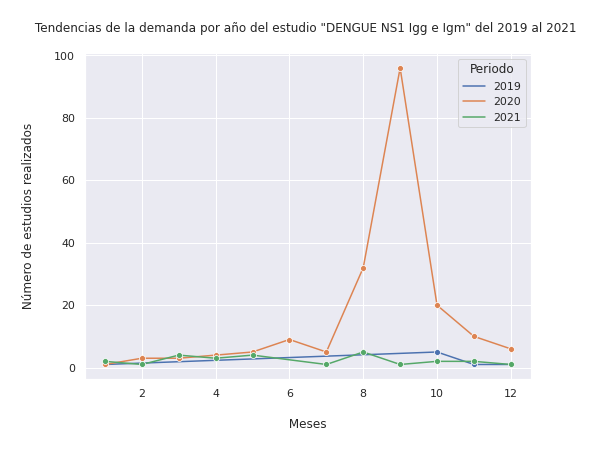

In [92]:
#Párametros de la gráfica lineal para mostrar la demanda de estudios del "Dengue"
fig = plt.figure(figsize =(8, 6)) 
sns.lineplot(data=df_dengue_tiempo, x="Mes", y="Cantidad", hue="Periodo", marker = 'o')
plt.title('\n Tendencias de la demanda por año del estudio "DENGUE NS1 Igg e Igm" del 2019 al 2021  \n')
plt.ylabel('\n Número de estudios realizados \n')
plt.xlabel('\n Meses \n')
plt.savefig("Comportamiento_demanda_dengue.jpg", dpi=300, bbox_inches='tight')
plt.xticks(rotation = 0);